# Task automatization

Here is a demonstration of a code that illustrates how we can get automatize an example repetitive task. 

Let's say we want to model the kinetics of a reaction mechanism: 

$$A + B \rightarrow C $$

on a certain catalyst (we will do something along the lines of this in Lab 2). Here we have two gaseous components A and B flow into the reactor, adsorb on the catalyst and react and through a set of intermediates we ultimately obtain component C, that later desorbs from the surface and flows out of the reactor.

Lets say we also possess a nice Python function that can analyse the kinetics of this reaction and when provided by the pressure ratio of the gaseous components A and B, it can calculate the partial pressure of component C in the out-flow gas. And our job is to uncover which is the optimal ratio of pressures of the gas that flows to the reactor that would maximize the reaction yield.

So instead of using that same Python function and calculating the reaction yield for a set of pressure ratios, noting down each of the input and output parameters by hand to some sort of table, and repeating the same thing again for a different pressure ratio, and then plotting the table columns, we can do this all at once.

The code below is a demonstration of how this can be done.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# Since we don't actually have a tool such as this one on hand, we will make a dummy one, just for illustration.

def calculate_yield(r):
    
    """ Calculates the reaction yield for reaction A + B --> C
    
    arguments:
       r - pressure ratio of A and B in in-flow gas
    
    returns:
       y - partial pressure of the C in out-flow gas
       
    """
    
    y = np.random.rand()*0.3 # since this is a dummy tool, it's okay that the output is pretty random :)
    
    return y
    

In [3]:
# First we need to arrange the input paramters - the pressure ratios, into a list.
# Let's say we are interested we want to calculate the reaction yield for 20 values in the interval of 0.5 to 2.
# In that case, we define the array of values like this:
pressure_ratios = np.linspace(0.5, 2.0, 20)

# Here we create an empty list where we plan to store the calculated values
results = []

# Here we enter the loop - we iterate through the different pressure ratios values and for each one we calculate the yield
for ratio in pressure_ratios: # this line in English basically says: 
                              # "for each item, which we name 'ratio' from the list/array called 'pressure ratios' do the following...
    
    reaction_yield = calculate_yield(ratio) # we instruct Python to run the function 'calculate_ratio' with an input parameter 
                                            # defined under the name 'ratio' (from previous line), and store the result of 
                                            # that calculation under the name 'reaction_yield'
    
    results.append(reaction_yield) # Here we simply append the new result to the results list
    

#### After the loop has finished 

# Take the data and make a table out of it:

# We first combine the data in a 2D matrix
data = np.vstack((pressure_ratios, np.array(results))).T


table = pd.DataFrame(data, columns = ['Pressure ratio','Reaction yield'])
table.index =+ table.index + 1 # setting the indices to start at 1 instead of 0

table.head(5) # since there are many datapoints, here we chose to display only the first 5

,Pressure ratio,Reaction yield
1,0.500000,0.140666
2,0.578947,0.064865
3,0.657895,0.079347
4,0.736842,0.143780
5,0.815789,0.048918


Sometimes when calculating something many times with many different variables, it is difficult to make sense of the results in the table and draw conclusions. Especially if we used a larger number of points in a pressure ratio interval, or if we chose to vary other parameters that go into calculating the reaction yield. We could have also varried the temperature of the simulation, or the catalyst porosity. In those cases we can just filter out what we need for a table automatically. In our example, we would probably want to see what conditions provide the highest reaction yield, and what that yield is. We can also use Pandas for this task.

In [6]:
highest_yield = table['Reaction yield'].max()
print(highest_yield)

# the pressure ratio for which the yield was the highest
best_ratio = table.loc[table['Reaction yield'].idxmax(), 'Pressure ratio']
print(best_ratio)

0.2804212122504326
0.8947368421052632


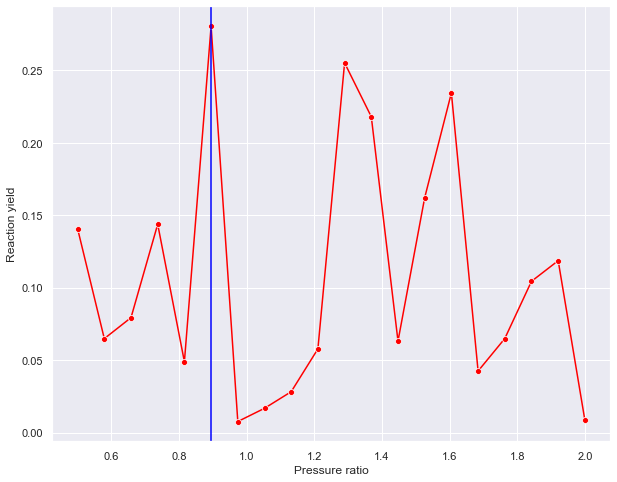

In [7]:
sns.lineplot(x='Pressure ratio', y='Reaction yield', data = table, marker= 'o', color='red')

#ploting the max yield line
plt.axvline(best_ratio, 0,1, color = 'blue')

We will use a similar framework when automatizing some things for the tasks in the lab. 